In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('data.csv')

In [25]:
ds.head(n=15)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


In [4]:
ds.shape

(2227, 3)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [7]:
ds.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

Text(0, 0.5, 'x2')

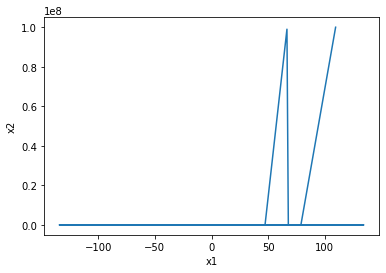

In [17]:
plt.plot(ds['x1'],ds['x2'],label = 'distribution of data')
plt.xlabel('x1')
plt.ylabel('x2')

In [15]:
ds['x2'].head()

0    115.000000
1     97.777159
2    106.767654
3    101.195477
4    115.000000
Name: x2, dtype: float64

C:\Users\HP\anaconda3\envs\env_dlib\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='x2'>

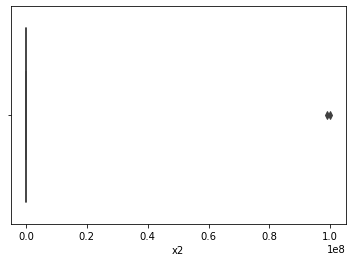

In [24]:
sns.boxplot(ds['x2'])

<AxesSubplot:>

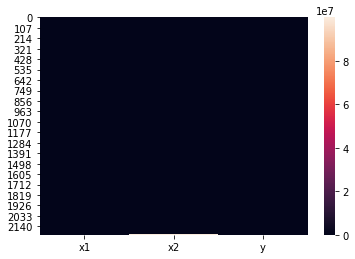

In [27]:
sns.heatmap(ds)

In [30]:
ds.fillna(ds.mean(),inplace=True)

In [31]:
ds.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
predictors = ds.drop("y",axis=1)
target = ds["y"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [33]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [35]:
Y_pred_lr.shape

(446,)

In [36]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 59.19 %


# SVM With Linear Kernal

In [56]:
from sklearn import svm
sv1 = svm.SVC(kernel='linear')
sv1.fit(X_train, Y_train)
Y_pred_svm_1 = sv1.predict(X_test)

In [57]:
Y_pred_svm_1.shape

(446,)

In [58]:
score_svm_linear = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 54.26 %


# SVM With RBF Kernal

In [59]:
from sklearn import svm
sv2 = svm.SVC(kernel='rbf')
sv2.fit(X_train, Y_train)
Y_pred_svm_2 = sv2.predict(X_test)

In [60]:
Y_pred_svm_2.shape

(446,)

In [61]:
score_svm_rbf = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 54.26 %


# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0
for x in range(10):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [63]:
print(Y_pred_dt.shape)

(446,)


In [64]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 93.5 %


# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [66]:
Y_pred_knn.shape

(446,)

In [67]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 95.29 %


# Observation 

### I Have observed out of five KNN performed well

In [68]:
scores = [score_lr,score_svm_linear,score_svm_rbf,score_dt,score_knn]
algorithms = ["Logistic Regression","Support Vector Machine with linear keranl","Support Vector Machine with rbf keranl","Decision Tree","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 59.19 %
The accuracy score achieved using Support Vector Machine with linear keranl is: 54.26 %
The accuracy score achieved using Support Vector Machine with rbf keranl is: 54.26 %
The accuracy score achieved using Decision Tree is: 93.5 %
The accuracy score achieved using K-Nearest Neighbors is: 95.29 %


C:\Users\HP\anaconda3\envs\env_dlib\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

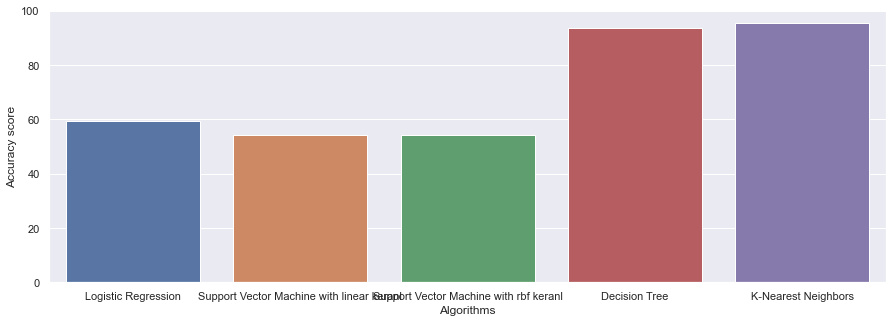

In [71]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

## thus we say K-Nearest_neighbors Acheived good result compared to other Algorithms with 95.29% 